<a href="https://colab.research.google.com/github/MekaRaptor/Graduation_Project/blob/berke-trein/Graduation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

drive_path = "/content/drive/MyDrive/"  # ZIP dosyanın bulunduğu klasör
os.listdir(drive_path)  # Klasördeki dosyaları listele


['Classroom',
 'Alper_Ağırman_201180010 (1).txt',
 'Alper_Ağırman_201180010.txt',
 'Ceng307_201180010_HW1.sln',
 'Bilge Adam Data Science',
 'Untitled Diagram (4).drawio',
 'Untitled Diagram (3).drawio',
 'Document (1).sdr',
 'Untitled Diagram (2).drawio',
 'AI_Model - Made with Clipchamp_1718179352783.mp4',
 'Project Details',
 'Adsız sunu.gslides',
 'Untitled Diagram (1).drawio',
 'Neural_Network Documentation dokümanının çevrilmiş kopyası.gdoc',
 'Neural_Network Documentation.gdoc',
 'Literatür Taraması.gdoc',
 'Adsız doküman.gdoc',
 'Staj Raporu.gdoc',
 'Neural_Network Documentation (1).pdf',
 'staj2018-sablon (3).docx',
 'SRS_aciklamalar.gdoc',
 'SRS-Sablon.gdoc',
 'SDD_aciklamalar (1).gdoc',
 'SDD_aciklamalar.gdoc',
 'Untitled Diagram.drawio',
 'SPMP_Ornek.gdoc',
 'SDD-Sablon.gdoc',
 'week9.gdoc',
 'llm.gdoc',
 'clustering.gdoc',
 'cnn_rnn_gnn.gdoc',
 'NN.gdoc',
 'GAZI Midterm.gdoc',
 'Meet Recordings',
 'Bilgilendirme Metni (1).docx',
 'Bilgilendirme Metni.docx',
 'Dönem

In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/Bitirme/Agriculture-Vision-2021.zip"  # ZIP dosyasının gerçek adını yaz
extract_path = "/content/veri_seti"  # Açılacağı yer

# ZIP dosyasını açma işlemi
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ ZIP dosyası başarıyla çıkarıldı.")


✅ ZIP dosyası başarıyla çıkarıldı.


In [ ]:
print(os.listdir(extract_path))


['Agriculture-Vision-2021']


In [ ]:
dataset_path = "/content/veri_seti/Agriculture-Vision-2021"

# Ana klasörleri listeleyelim
folders = os.listdir(dataset_path)
print("📂 Veri Seti İçeriği:")
for folder in folders:
    print("-", folder)


📂 Veri Seti İçeriği:
- val
- train
- test


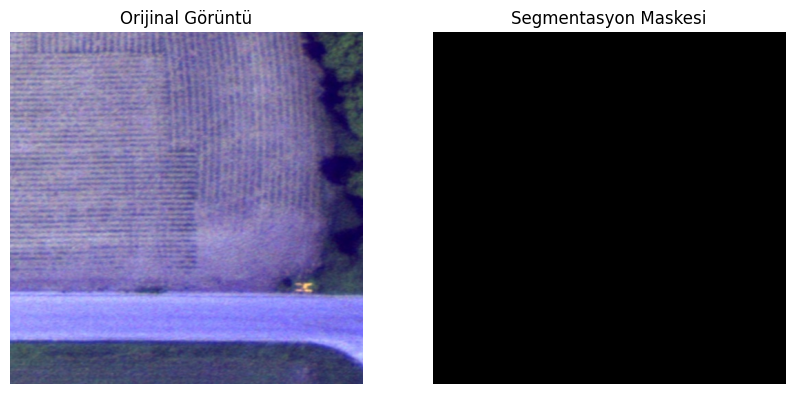

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Veri seti yolunu doğru tanımlayın
dataset_path = "/content/veri_seti/Agriculture-Vision-2021"

# Örnek bir RGB görüntü ve maske yolu
image_path = os.path.join(dataset_path, "train/images/rgb/11IE4DKTR_11556-9586-12068-10098.jpg")  # RGB görüntü dosya adı
mask_path = os.path.join(dataset_path, "train/masks/11IE4DKTR_11556-9586-12068-10098.png")  # Mask dosya adı

# Görüntüyü yükleme
image = cv2.imread(image_path)  # Görüntüyü BGR formatında yükler
if image is None:
    raise FileNotFoundError(f"Görüntü bulunamadı: {image_path}")

# Maskeyi yükleme
mask = cv2.imread(mask_path, 0)  # Maskeyi grayscale olarak yükle
if mask is None:
    raise FileNotFoundError(f"Maske bulunamadı: {mask_path}")

# Görüntüleri ekrana getirme
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # BGR formatını RGB'ye çevir
axes[0].set_title("Orijinal Görüntü")
axes[0].axis("off")

axes[1].imshow(mask, cmap="gray")
axes[1].set_title("Segmentasyon Maskesi")
axes[1].axis("off")

plt.show()


In [ ]:

print(f"Görüntü boyutları: {image.shape}")
print(f"Maske sınıfları: {np.unique(mask)}")


Görüntü boyutları: (512, 512, 3)
Maske sınıfları: [255]


In [ ]:
import os
import cv2

# Görüntü boyutlarını kontrol etme
rgb_folder = "/content/veri_seti/Agriculture-Vision-2021/train/images/rgb"
nir_folder = "/content/veri_seti/Agriculture-Vision-2021/train/images/nir"

rgb_sizes = []
nir_sizes = []

for image_name in os.listdir(rgb_folder):
    image_path = os.path.join(rgb_folder, image_name)
    image = cv2.imread(image_path)
    if image is not None:
        rgb_sizes.append(image.shape[:2])

for image_name in os.listdir(nir_folder):
    image_path = os.path.join(nir_folder, image_name)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        nir_sizes.append(image.shape)

print("RGB Görsellerin Boyutları:", set(rgb_sizes))
print("NIR Görsellerin Boyutları:", set(nir_sizes))



RGB Görsellerin Boyutları: {(512, 512)}
NIR Görsellerin Boyutları: {(512, 512)}


In [ ]:
labels_folder = "/content/veri_seti/Agriculture-Vision-2021/train/labels"
label_counts = {}

for label_class in os.listdir(labels_folder):
    class_folder = os.path.join(labels_folder, label_class)
    if os.path.isdir(class_folder):
        label_counts[label_class] = len(os.listdir(class_folder))

print("Sınıf Dağılımları:")
for label, count in label_counts.items():
    print(f"{label}: {count}")


Sınıf Dağılımları:
weed_cluster: 56944
storm_damage: 56944
water: 56944
endrow: 56944
nutrient_deficiency: 56944
drydown: 56944
waterway: 56944
planter_skip: 56944
double_plant: 56944


In [ ]:
mismatched_files = []

for image_name in os.listdir(rgb_folder):
    rgb_path = os.path.join(rgb_folder, image_name)
    nir_path = os.path.join(nir_folder, image_name.replace(".jpg", ".png"))

    rgb_image = cv2.imread(rgb_path)
    nir_image = cv2.imread(nir_path, cv2.IMREAD_GRAYSCALE)

    if rgb_image is not None and nir_image is not None:
        if rgb_image.shape[:2] != nir_image.shape:
            mismatched_files.append(image_name)

print("Boyutları eşleşmeyen dosyalar:", mismatched_files)


Boyutları eşleşmeyen dosyalar: []


In [ ]:
mask_folder = "/content/veri_seti/Agriculture-Vision-2021/train/masks"
unique_classes = set()

for mask_name in os.listdir(mask_folder):
    mask_path = os.path.join(mask_folder, mask_name)
    mask = cv2.imread(mask_path, 0)
    if mask is not None:
        unique_classes.update(set(mask.flatten()))

print("Maskelerde Bulunan Sınıflar:", unique_classes)


Maskelerde Bulunan Sınıflar: {0, 255}


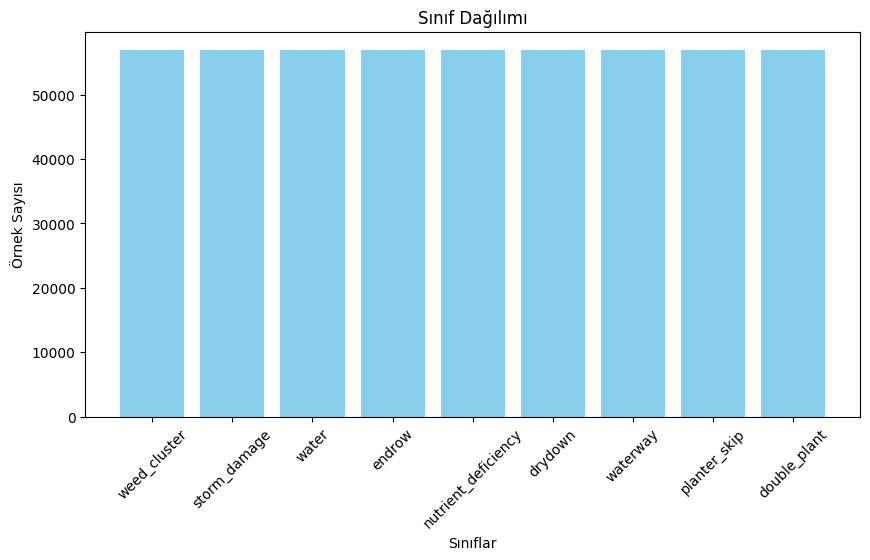

In [ ]:
import matplotlib.pyplot as plt

# Sınıf dağılımını al
label_counts = {}

for cls in classes:
    class_path = os.path.join(label_folder, cls)
    if os.path.isdir(class_path):
        label_counts[cls] = len(os.listdir(class_path))

# Bar grafiği oluştur
plt.figure(figsize=(10, 5))
plt.bar(label_counts.keys(), label_counts.values(), color="skyblue")
plt.title("Sınıf Dağılımı")
plt.xlabel("Sınıflar")
plt.ylabel("Örnek Sayısı")
plt.xticks(rotation=45)
plt.show()


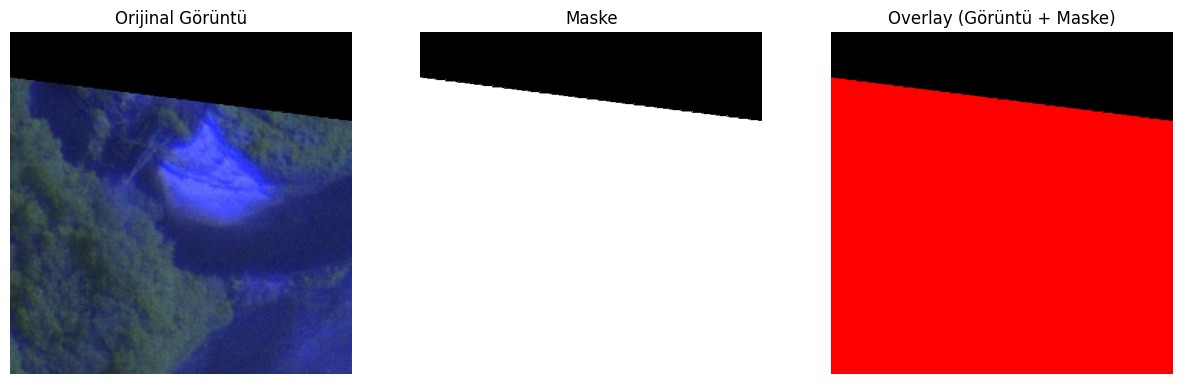

In [ ]:


# Örnek bir dosya seçimi
sample_file = "1EE4EWQJC_5092-552-5604-1064"
rgb_path = os.path.join(rgb_folder, sample_file + ".jpg")
mask_path = os.path.join(mask_folder, sample_file + ".png")

# Görüntüleri yükle
rgb_image = cv2.imread(rgb_path)
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)  # BGR'den RGB'ye dönüştür

mask_image = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Maskeyi overlay olarak ekleme
overlay = rgb_image.copy()
overlay[mask_image > 0] = [255, 0, 0]  # Maske alanlarını kırmızı ile işaretle

# Görüntüleri görselleştirme
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(rgb_image)
axes[0].set_title("Orijinal Görüntü")
axes[0].axis("off")

axes[1].imshow(mask_image, cmap="gray")
axes[1].set_title("Maske")
axes[1].axis("off")

axes[2].imshow(overlay)
axes[2].set_title("Overlay (Görüntü + Maske)")
axes[2].axis("off")

plt.show()


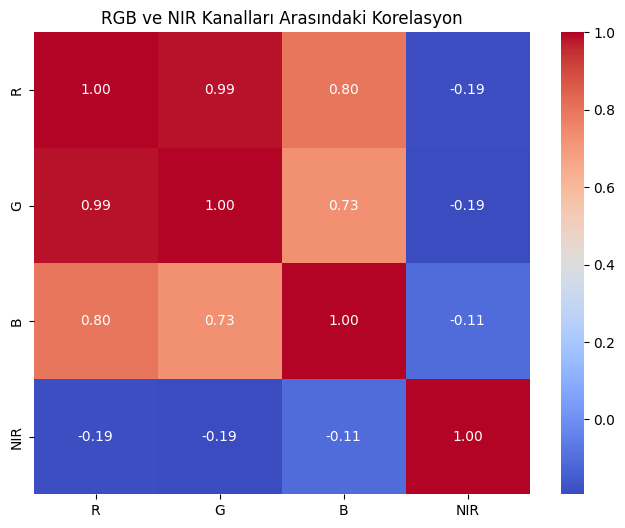

In [ ]:
import seaborn as sns

sample = "1AD76MIZN_659-8394-1171-8906"
# Örnek bir dosya seçimi
nir_path = os.path.join(nir_folder, sample + ".jpg")

# NIR görüntüsünü yükle
nir_image = cv2.imread(nir_path, cv2.IMREAD_GRAYSCALE)

# Eğer görüntü yüklenemezse hata mesajı ver
if nir_image is None:
    print(f"NIR görüntüsü yüklenemedi: {nir_path}")
else:
    # RGB ve NIR kanallarını 1D bir diziye dönüştürme
    r_channel = rgb_image[:, :, 0].flatten()
    g_channel = rgb_image[:, :, 1].flatten()
    b_channel = rgb_image[:, :, 2].flatten()
    nir_channel = nir_image.flatten()

    # Pandas DataFrame oluşturma
    data = pd.DataFrame({
        "R": r_channel,
        "G": g_channel,
        "B": b_channel,
        "NIR": nir_channel
    })

    # Korelasyon matrisini hesaplama
    correlation_matrix = data.corr()

    # Korelasyon matrisini görselleştirme
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("RGB ve NIR Kanalları Arasındaki Korelasyon")
    plt.show()

